<h2><font color="#004D7F" size=6>Módulo 5. Fase de modelado</font></h2>



<h1><font color="#004D7F" size=5>2. Plantilla para comparar algoritmos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías](#section11)
    * [1.2. CSV](#section12)
* [2. Plantilla para comparar algoritmos](#section2)
* [3. Estudio de linea base](#section3)
    * [3.1. Instalación de librerías](#section31)
    * [3.2. Problema de clasificación](#section32)
    * [3.3. Problema de regresión](#section33)

In [5]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

C:\Users\eel20\AppData\Local\Temp\ipykernel_12332\1126351303.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

Cuando trabajas en un proyecto de ML, a menudo terminas con múltiples buenos modelos para elegir. Cada modelo tendrá diferentes características de rendimiento. Usando métodos de remuestreo como la validación cruzada, puede obtener una estimación de la precisión de cada modelo en datos no etiquetados. Debe poder utilizar estas estimaciones para elegir uno o dos mejores modelos del conjunto de modelos que ha creado.

Cuando tiene un nuevo conjunto de datos, es una buena idea visualizar los datos utilizando diferentes técnicas para ver los datos desde diferentes perspectivas. La misma idea se aplica a la selección del modelo. Debe usar una cantidad de formas diferentes de ver la precisión estimada de sus algoritmos de ML para elegir uno o dos algoritmos para finalizar. Una forma de hacerlo es utilizar métodos de visualización para mostrar la precisión promedio, la varianza y otras propiedades de la distribución de las precisiones del modelo.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías</font>

Vamos a declarar algunas librerías generales que ya hemos estado trabajando y que usaremos a lo largo de la sección.

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

<a id="section12"></a>
## <font color="#004D7F"> 1.2. CSV</font>

En esta lección, se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión. En cada código, el conjunto de datos se descarga directamente del repositorio de UCI Machine Learning.
* **Clasificación**: Se utilizará el conjunto de datos de Pima Indians Diabetes con una validación cruzada 10-folds para demostrar cómo verificar cada algoritmo de ML y se utilizan medidas de precisión promedio para indicar el rendimiento del algoritmo.

In [7]:
# Clasification problem
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section31"></a>
# <font color="#004D7F"> 2. Plantilla para comparar algoritmos</font>

La clave para una comparación equitativa de los algoritmos de ML es garantizar que cada algoritmo se evalúe de la misma manera en los mismos datos. Los algoritmos se comparan en un único conjunto de datos:
* Logistic Regression.
* Linear Discriminant Analysis.
* k-Nearest Neighbors.
* Classification and Regression Trees. 
* Naive Bayes.
* Support Vector Machines.

El código mostrará:
* Una lista de cada nombre corto de algoritmo, el accuracy media y el accuracy de la desviación estándar.
* Un diagrama Boxplot que muestra la extensión de los puntajes de accuracy en cada fold de validación cruzada para cada algoritmo.

In [26]:
# Compare Algorithms
# prepare models
models = []
models.append(('LoR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('K-NN', KNeighborsClassifier()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=19)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
#models.append(('SVM', SVC(gamma='auto', C=2.0)))
models.append(('SVM', SVC(gamma='auto', C=2.0, kernel='linear')))


# evaluate each model in turn
results = []
names= []
scoring = 'accuracy'

#### mas rapido 
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

#### espera que todos terminen para presentar el resultado
#for name, model in models:
#    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
#    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#    results.append(cv_results)
#    names.append(name)
#    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)  Total: ({cv_results.mean()*100.0 - cv_results.std()*100.0:,.2f})")


LoR: 77.22% (4.97%)
LDA: 76.70% (4.80%)
K-NN: 76.17% (4.56%)
CART: 68.77% (5.21%)
NB: 75.91% (3.90%)
SVM: 76.95% (3.69%)


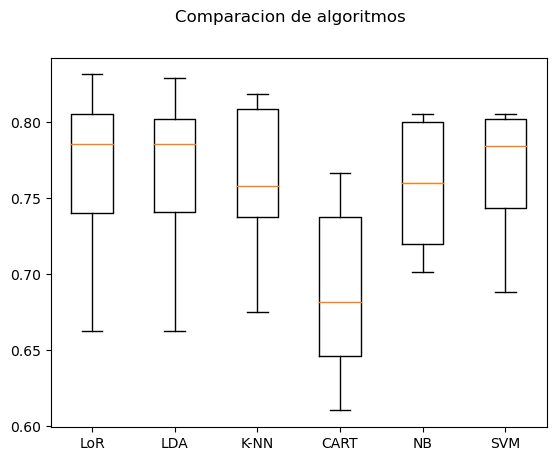

In [27]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle("Comparacion de algoritmos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

A partir de estos resultados, observamos que tanto LoR como LDA son quizás dignos de estudios adicionales sobre este problema.

<a id="section3"></a>
# <font color="#004D7F"> 3. Estudio de línea base</font>

Como se ha podido ver en este tema existen un gran número de algoritmos de machine learning. Poder identificar el mejor de ellos no es una tarea simple, no solamente por ser demasiados, sino también por el naturaleza del algoritmo el cual puede tener una cantidad de hiperparámetros determinante en los resultados.

Para intentar sacar el mejor algoritmo base que mejor se comporte a nuestro dataset se tiene una librería que nos permite obtener el mejor modelo sin configuración de sus hiperparámetros, es decir, mejor algoritmo de linea base. Esta librería se llama [`lazypredict`](https://lazypredict.readthedocs.io/en/latest/).

<div class="alert alert-block alert-info">  
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`lazypredict`](https://lazypredict.readthedocs.io/en/latest/).
</div> 

<div class="alert alert-block alert-info">  
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Github oficial de [`lazypredict`](https://github.com/shankarpandala/lazypredict).
</div> 

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Instalación de librerías</font>

In [28]:
!pip install lazypredict
!pip install tqdm
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install pytest

     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.4/70.9 MB 8.5 MB/s eta 0:00:09
     ---------------------------------------- 0.8/70.9 MB 8.2 MB/s eta 0:00:09
      --------------------------------------- 1.2/70.9 MB 8.5 MB/s eta 0:00:09
      --------------------------------------- 1.5/70.9 MB 8.0 MB/s eta 0:00:09
     - -------------------------------------- 1.8/70.9 MB 8.4 MB/s eta 0:00:09
     - -------------------------------------- 2.2/70.9 MB 8.1 MB/s eta 0:00:09
     - -------------------------------------- 2.5/70.9 MB 7.5 MB/s eta 0:00:10
     - -------------------------------------- 2.7/70.9 MB 7.4 MB/s eta 0:00:10
     - -------------------------------------- 3.1/70.9 MB 7.3 MB/s eta 0:00:10
     -- ------------------------------------- 3.6/70.9 MB 7.9 MB/s eta 0:00:09
     -- ------------------------------------- 4.1/70.9 MB 8.1 MB/s eta 0:00:09
     -- ------------------------------------- 4.5/70.9 MB 8

     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     ---------------------------------------- 0.3/101.0 MB 7.0 MB/s eta 0:00:15
     ---------------------------------------- 0.8/101.0 MB 8.3 MB/s eta 0:00:13
     ---------------------------------------- 1.2/101.0 MB 8.8 MB/s eta 0:00:12
      --------------------------------------- 1.6/101.0 MB 8.7 MB/s eta 0:00:12
      --------------------------------------- 2.1/101.0 MB 9.1 MB/s eta 0:00:11
     - -------------------------------------- 2.6/101.0 MB 9.3 MB/s eta 0:00:11
     - -------------------------------------- 3.1/101.0 MB 9.5 MB/s eta 0:00:11
     - -------------------------------------- 3.5/101.0 MB 9.8 MB/s eta 0:00:10
     - ------------------------------------- 4.2/101.0 MB 10.0 MB/s eta 0:00:10
     - ------------------------------------- 4.8/101.0 MB 10.3 MB/s eta 0:00:10
     -- ------------------------------------ 5.5/101.0 MB 10.9 MB/s eta 0:00:09
     -- ------------------------------------ 6.

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Problema de clasificación</font>

In [29]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

ModuleNotFoundError: No module named 'sklearn.externals._pep562'

<a id="section33"></a>
## <font color="#004D7F"> 3.3. Problema de regresión</font>

In [30]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

ModuleNotFoundError: No module named 'sklearn.externals._pep562'

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>